In [168]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from PIL import Image
from pylab import *

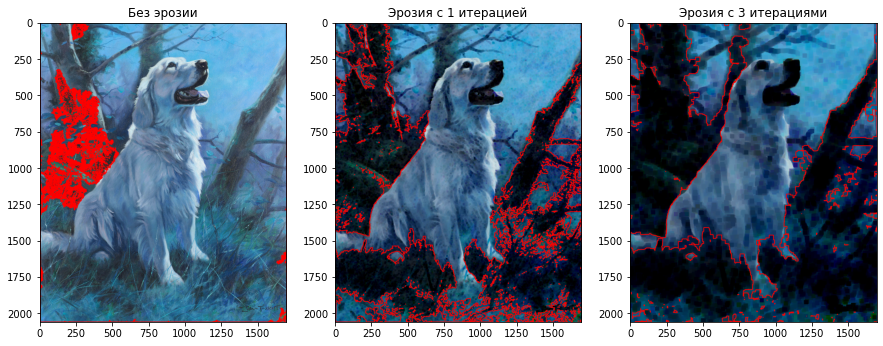

In [ ]:
hsv_min = np.array((2,28,65), np.uint8)
hsv_max = np.array((26,238,255), np.uint8)

fn = "1318.jpeg"
img = cv2.imread('1318.jpeg')
#img = cv2.resize(array(img), (400, 500))
kernel = np.ones((10,10),np.uint8)
img2 = cv2.erode(img,kernel,iterations = 1)
img3 = cv2.erode(img,kernel,iterations = 3)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
thresh = cv2.inRange(hsv, hsv_min, hsv_max)
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img,contours, -1, (255,0,0),3, cv2.LINE_AA, hierarchy, 1)

hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
thresh = cv2.inRange(hsv, hsv_min, hsv_max)
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img2,contours, -1, (255,0,0),3, cv2.LINE_AA, hierarchy, 1)

hsv = cv2.cvtColor(img3, cv2.COLOR_BGR2HSV)
thresh = cv2.inRange(hsv, hsv_min, hsv_max)
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img3,contours, -1, (255,0,0),3, cv2.LINE_AA, hierarchy, 1)

plt.figure(figsize=(15, 10))
subplot(1,3,1), imshow(img)
title('Без эрозии')
subplot(1,3,2), imshow(img2)
title('Эрозия с 1 итерацией')
subplot(1,3,3), imshow(img3)
title('Эрозия с 3 итерациями')
show()

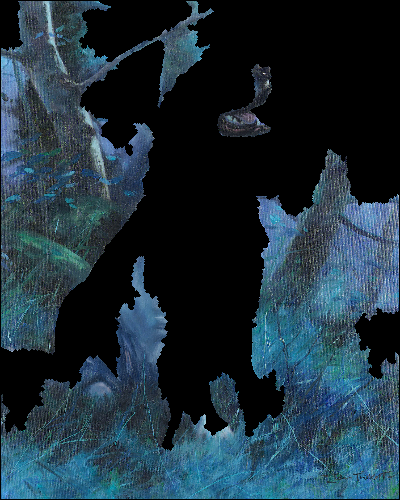

In [ ]:
img = cv2.imread('1318.jpeg')
img = cv2.resize(img, (400, 500))
b = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(b,0,255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
fg = cv2.erode(thresh, None,iterations = 6)
bgt = cv2.dilate(thresh, None,iterations = 6 )
ret,bg = cv2.threshold(bgt, 1, 128, 1)
marker = cv2.add(fg,bg)
marker32 = np.int32(marker)
cv2.watershed(img,marker32)
m = cv2.convertScaleAbs(marker32)
ret, thresh = cv2.threshold(m, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
res = cv2.bitwise_and(img, img, mask = thresh)
Image.fromarray(res)

<Figure size 432x288 with 0 Axes>

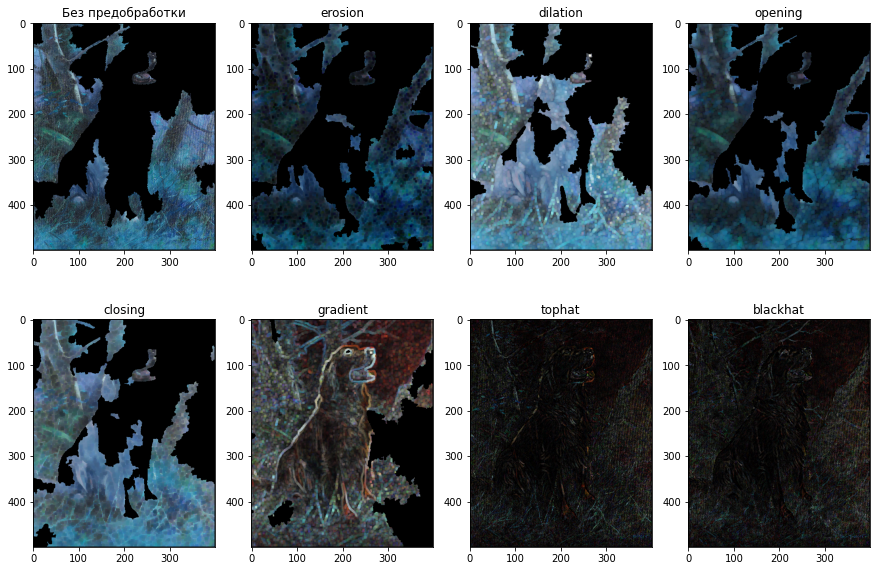

In [ ]:
#im=Image.open('1318.jpeg')
#img = array(im.convert('L'))
img = cv2.imread('1318.jpeg')
img = cv2.resize(img, (400, 500))
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
dilation = cv2.dilate(img,kernel,iterations = 1)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

b = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(b,0,255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
fg = cv2.erode(thresh, None,iterations = 6)
bgt = cv2.dilate(thresh, None,iterations = 6 )
ret,bg = cv2.threshold(bgt, 1, 128, 1)
marker = cv2.add(fg,bg)
marker32 = np.int32(marker)
cv2.watershed(img,marker32)
m = cv2.convertScaleAbs(marker32)
ret, thresh = cv2.threshold(m, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
res = cv2.bitwise_and(img, img, mask = thresh)

b = cv2.cvtColor(erosion,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(b,0,255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
fg = cv2.erode(thresh, None,iterations = 6)
bgt = cv2.dilate(thresh, None,iterations = 6 )
ret,bg = cv2.threshold(bgt, 1, 128, 1)
marker = cv2.add(fg,bg)
marker32 = np.int32(marker)
cv2.watershed(erosion,marker32)
m = cv2.convertScaleAbs(marker32)
ret, thresh = cv2.threshold(m, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
erosion = cv2.bitwise_and(erosion, erosion, mask = thresh)

b = cv2.cvtColor(dilation,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(b,0,255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
fg = cv2.erode(thresh, None,iterations = 6)
bgt = cv2.dilate(thresh, None,iterations = 6 )
ret,bg = cv2.threshold(bgt, 1, 128, 1)
marker = cv2.add(fg,bg)
marker32 = np.int32(marker)
cv2.watershed(dilation,marker32)
m = cv2.convertScaleAbs(marker32)
ret, thresh = cv2.threshold(m, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
dilation = cv2.bitwise_and(dilation, dilation, mask = thresh)


b = cv2.cvtColor(opening,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(b,0,255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
fg = cv2.erode(thresh, None,iterations = 6)
bgt = cv2.dilate(thresh, None,iterations = 6 )
ret,bg = cv2.threshold(bgt, 1, 128, 1)
marker = cv2.add(fg,bg)
marker32 = np.int32(marker)
cv2.watershed(opening,marker32)
m = cv2.convertScaleAbs(marker32)
ret, thresh = cv2.threshold(m, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
opening = cv2.bitwise_and(opening, opening, mask = thresh)


b = cv2.cvtColor(closing,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(b,0,255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
fg = cv2.erode(thresh, None,iterations = 6)
bgt = cv2.dilate(thresh, None,iterations = 6 )
ret,bg = cv2.threshold(bgt, 1, 128, 1)
marker = cv2.add(fg,bg)
marker32 = np.int32(marker)
cv2.watershed(closing,marker32)
m = cv2.convertScaleAbs(marker32)
ret, thresh = cv2.threshold(m, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
closing = cv2.bitwise_and(closing, closing, mask = thresh)


b = cv2.cvtColor(gradient,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(b,0,255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
fg = cv2.erode(thresh, None,iterations = 6)
bgt = cv2.dilate(thresh, None,iterations = 6 )
ret,bg = cv2.threshold(bgt, 1, 128, 1)
marker = cv2.add(fg,bg)
marker32 = np.int32(marker)
cv2.watershed(gradient,marker32)
m = cv2.convertScaleAbs(marker32)
ret, thresh = cv2.threshold(m, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
gradient = cv2.bitwise_and(gradient, gradient, mask = thresh)


b = cv2.cvtColor(tophat,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(b,0,255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
fg = cv2.erode(thresh, None,iterations = 6)
bgt = cv2.dilate(thresh, None,iterations = 6 )
ret,bg = cv2.threshold(bgt, 1, 128, 1)
marker = cv2.add(fg,bg)
marker32 = np.int32(marker)
cv2.watershed(tophat,marker32)
m = cv2.convertScaleAbs(marker32)
ret, thresh = cv2.threshold(m, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
tophat = cv2.bitwise_and(tophat, tophat, mask = thresh)


b = cv2.cvtColor(blackhat,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(b,0,255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
fg = cv2.erode(thresh, None,iterations = 6)
bgt = cv2.dilate(thresh, None,iterations = 6 )
ret,bg = cv2.threshold(bgt, 1, 128, 1)
marker = cv2.add(fg,bg)
marker32 = np.int32(marker)
cv2.watershed(blackhat,marker32)
m = cv2.convertScaleAbs(marker32)
ret, thresh = cv2.threshold(m, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
blackhat = cv2.bitwise_and(blackhat, blackhat, mask = thresh)


figure()
plt.figure(figsize=(15, 10))
subplot(2,4,1), imshow(res)
title('Без предобработки')
subplot(2,4,2), imshow(erosion)
title('erosion')
subplot(2,4,3), imshow(dilation)
title('dilation')
subplot(2,4,4), imshow(opening)
title('opening')
subplot(2,4,5), imshow(closing)
title('closing')
subplot(2,4,6), imshow(gradient)
title('gradient')
subplot(2,4,7), imshow(tophat)
title('tophat')
subplot(2,4,8), imshow(blackhat)
title('blackhat')
show()

In [169]:
from skimage import io

In [170]:
from skimage.color import rgb2gray

In [171]:
from skimage.filters import sobel

In [172]:
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed

In [173]:
from skimage.segmentation import mark_boundaries

In [174]:
from skimage.util import img_as_float

In [187]:
%%time
segments_fz = felzenszwalb(img, scale=200, sigma=0.5, min_size=50)

CPU times: user 398 ms, sys: 2.96 ms, total: 401 ms
Wall time: 405 ms


In [176]:
%%time
segments_slic = slic(img, n_segments=60, compactness=20, sigma=2) 

CPU times: user 287 ms, sys: 0 ns, total: 287 ms
Wall time: 288 ms


In [202]:
%%time
segments_quick = quickshift(img, kernel_size=7, max_dist=12, ratio=0.5) 

CPU times: user 10.5 s, sys: 5.59 ms, total: 10.5 s
Wall time: 10.5 s


In [198]:
%%time
gradient = sobel(rgb2gray(img))
segments_watershed = watershed(gradient, markers=80, compactness=0.0002)

CPU times: user 208 ms, sys: 1.07 ms, total: 209 ms
Wall time: 211 ms


In [207]:
print(f"Felzenszwalb: ") 
print(f"SLIC: ") 
print(f"Quickshift: ")
print(f"Segments_watersheds number of segments: ")

Felzenszwalb: 
SLIC: 
Quickshift: 
Segments_watersheds number of segments: 


In [205]:
print(f"Felzenszwalb number of segments: {len(np.unique(segments_fz))}") 
print(f"SLIC number of segments: {len(np.unique(segments_slic))}") 
print(f"Quickshift number of segments: {len(np.unique(segments_quick))}")
print(f"Segments_watersheds number of segments: {len(np.unique(segments_watershed))}")

Felzenszwalb number of segments: 265
SLIC number of segments: 56
Quickshift number of segments: 126
Segments_watersheds number of segments: 80


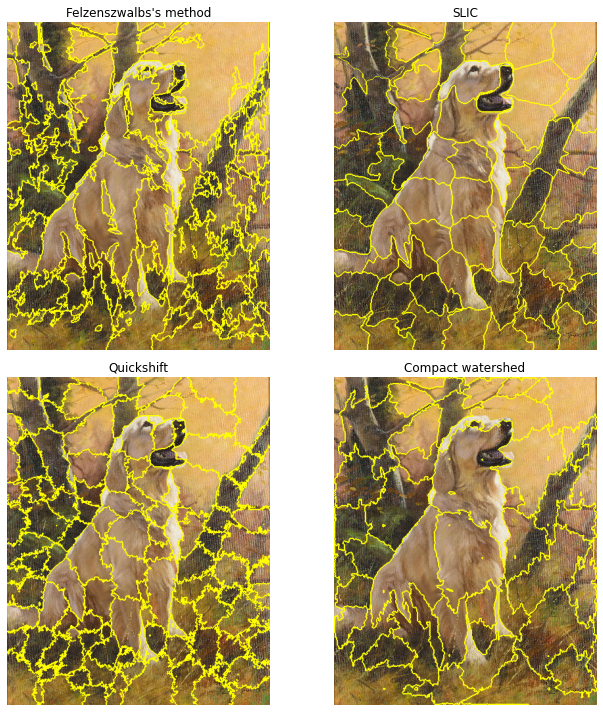

In [206]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
ax[0, 0].imshow(mark_boundaries(img, segments_fz))
ax[0, 0].set_title("Felzenszwalbs's method")
ax[0, 1].imshow(mark_boundaries(img, segments_slic))
ax[0, 1].set_title('SLIC')
ax[1, 0].imshow(mark_boundaries(img, segments_quick))
ax[1, 0].set_title('Quickshift')
ax[1, 1].imshow(mark_boundaries(img, segments_watershed))
ax[1, 1].set_title('Compact watershed')
for a in ax.ravel():
  a.set_axis_off()
plt.tight_layout()
plt.show()

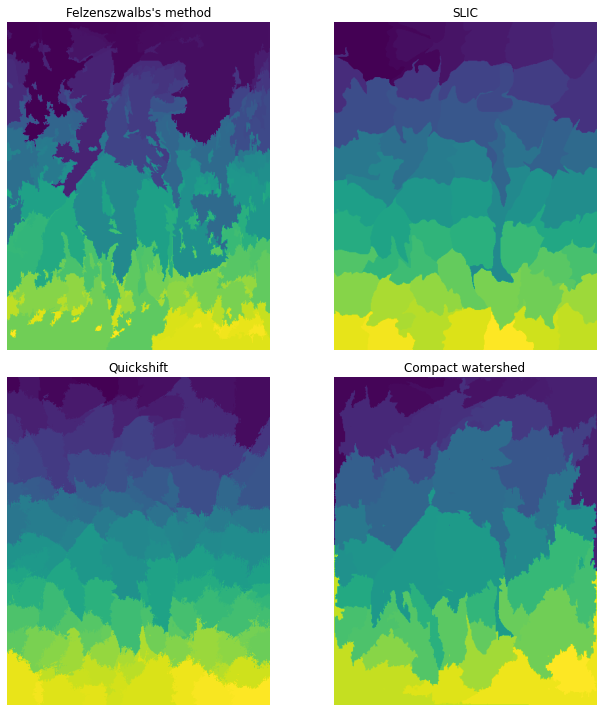

In [203]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
ax[0, 0].imshow( segments_fz)
ax[0, 0].set_title("Felzenszwalbs's method")
ax[0, 1].imshow( segments_slic)
ax[0, 1].set_title('SLIC')
ax[1, 0].imshow(segments_quick)
ax[1, 0].set_title('Quickshift')
ax[1, 1].imshow(segments_watershed)
ax[1, 1].set_title('Compact watershed')
for a in ax.ravel():
  a.set_axis_off()
plt.tight_layout()
plt.show()